In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv',sep = ',',low_memory=False)

In [3]:
data

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55672698,1328,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:02:45 AM,01/01/2013 12:07:55 AM,3.0,01/01/2013 12:18:20 AM,"1 - More than initial alarm, less than Signal 7-5",935.0,86 - Investigate,...,11215,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,55672699,0688,353 - Removal of victim(s) from stalled elevator,01/01/2013 12:03:55 AM,01/01/2013 12:13:10 AM,1.0,01/01/2013 12:30:33 AM,"1 - More than initial alarm, less than Signal 7-5",1598.0,64 - Shut down system,...,10001,1 - Manhattan,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,55672700,9604,"651 - Smoke scare, odor of smoke",01/01/2013 12:04:03 AM,01/01/2013 12:06:19 AM,4.0,01/01/2013 12:11:21 AM,"1 - More than initial alarm, less than Signal 7-5",438.0,86 - Investigate,...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55672703,2897,"331 - Lock-in (if lock out , use 511 )",01/01/2013 12:04:37 AM,01/01/2013 12:11:02 AM,1.0,01/01/2013 12:23:29 AM,"1 - More than initial alarm, less than Signal 7-5",1132.0,"70 - Assistance, other",...,10472,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,55672705,2602,"710 - Malicious, mischievous false call, other",01/01/2013 12:05:10 AM,01/01/2013 12:08:20 AM,6.0,01/01/2013 12:10:29 AM,"1 - More than initial alarm, less than Signal 7-5",319.0,"00 - Action taken, other",...,11219,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
copydata = data.copy()

In [5]:
copydata.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
total=sum(copydata['INCIDENT_TYPE_DESC'].value_counts())

In [6]:
maxtype = max(copydata['INCIDENT_TYPE_DESC'].value_counts())

In [7]:
buildingfire = copydata.loc[copydata['INCIDENT_TYPE_DESC']=='111 - Building fire']

In [8]:
buildingfire['INCIDENT_TYPE_DESC'].value_counts()[0]

13089

In [10]:
smokescare = copydata.loc[copydata['INCIDENT_TYPE_DESC']=='651 - Smoke scare, odor of smoke']

In [11]:
smokescare['INCIDENT_TYPE_DESC'].value_counts()[0]

148924

In [12]:
buildingfire['INCIDENT_TYPE_DESC'].value_counts()[0]/smokescare['INCIDENT_TYPE_DESC'].value_counts()[0]

0.08789046762106846

In [13]:
falsealarm = copydata.loc[copydata['INCIDENT_TYPE_DESC']== '710 - Malicious, mischievous false call, other']
falsealarmmanhatan = falsealarm.loc[falsealarm['BOROUGH_DESC']=='1 - Manhattan']
falsealaramstatisland = falsealarm.loc[falsealarm['BOROUGH_DESC']=='3 - Staten Island']
manhatanratio = falsealarmmanhatan['INCIDENT_TYPE_DESC'].value_counts()[0]/total
statislandratio = falsealaramstatisland['INCIDENT_TYPE_DESC'].value_counts()[0]/total

In [14]:
falsealarmratio = statislandratio/manhatanratio

In [15]:
falsealarmratio

0.327892234548336

In [16]:
buildingfire['ARRIVAL_DATE_TIME'] = pd.DatetimeIndex(buildingfire['ARRIVAL_DATE_TIME'])
buildingfire['INCIDENT_DATE_TIME'] = pd.DatetimeIndex(buildingfire['INCIDENT_DATE_TIME'])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
buildingfire['REACTION_TIME'] = buildingfire['ARRIVAL_DATE_TIME']-buildingfire['INCIDENT_DATE_TIME']

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
third = buildingfire['REACTION_TIME'].quantile([0.75])

In [19]:
time = pd.DatetimeIndex(third)
minute = time.hour*60+time.minute+time.second/60

In [20]:
"{0:.10f}".format(minute[0])

'4.1500000000'

In [21]:
totalincidenttime = pd.DatetimeIndex(copydata['INCIDENT_DATE_TIME'])

In [22]:
cooking = copydata.loc[copydata['INCIDENT_TYPE_DESC']=='113 - Cooking fire, confined to container']
cookingincidenttime = pd.DatetimeIndex(cooking['INCIDENT_DATE_TIME'])

In [23]:
totalincidentsdict= {}
for time in totalincidenttime:
    if time.hour not in totalincidentsdict:
        totalincidentsdict[time.hour]=1
    if time.hour in totalincidentsdict:
        totalincidentsdict[time.hour]+=1
        
cookingincidentdict = {}
for time in cookingincidenttime:
    if time.hour not in cookingincidentdict:
        cookingincidentdict[time.hour]=1
    if time.hour in cookingincidentdict:
        cookingincidentdict[time.hour]+=1

In [24]:
timeratio = {}
for i in cookingincidentdict.keys() and totalincidentsdict.keys():
    rate = cookingincidentdict[i]/totalincidentsdict[i]
    timeratio[i]=rate

In [25]:
sorted(timeratio.items(), key=lambda x: x[1])


[(5, 0.023871538149059714),
 (4, 0.024004639552182353),
 (2, 0.025573491928632116),
 (3, 0.025657162221038872),
 (1, 0.027389145395940413),
 (7, 0.027630999559665345),
 (6, 0.027928031610848968),
 (0, 0.0285905740451195),
 (23, 0.0286069511161345),
 (8, 0.03084143846482063),
 (22, 0.03171061664580221),
 (9, 0.03405413285388017),
 (10, 0.03639552729664547),
 (21, 0.03883345567910969),
 (11, 0.039190043183653406),
 (14, 0.03951847766571177),
 (13, 0.040718896882100585),
 (15, 0.04074803616773857),
 (12, 0.04266919217774137),
 (16, 0.04427730797708585),
 (20, 0.04515787032435477),
 (17, 0.048002700243608934),
 (19, 0.05052900115816822),
 (18, 0.0508539154601282)]

In [26]:
censuszip = pd.read_csv('2010+Census+Population+By+Zipcode+(ZCTA).csv')

In [27]:
censuszip.columns=['ZIP_CODE','Population']

In [28]:
buildingfire['ZIP_CODE'] = buildingfire['ZIP_CODE'].astype(float)
buildfirepopdata = pd.merge(buildingfire,censuszip,how='left',on = 'ZIP_CODE')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
pd.set_option('display.max_columns', 30)
buildfirepopdata

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,ACTION_TAKEN2_DESC,ACTION_TAKEN3_DESC,PROPERTY_USE_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,REACTION_TIME,Population
0,55672965,2595,111 - Building fire,2013-01-01 00:58:10,2013-01-01 01:00:50,15.0,01/01/2013 04:15:20 AM,7 - Signal 7-5,11830.0,11 - Extinguishment by fire service personnel,NaN,NaN,"579 - Motor vehicle or boat sales, services, r...",60 ST,11219,4 - Brooklyn,NaN,NaN,NaN,1.0,5 - Beyond building of origin,N - None present,N - None Present,0.0,00:02:40,92221.0
1,55673299,2591,111 - Building fire,2013-01-01 02:22:56,2013-01-01 02:25:23,9.0,01/01/2013 07:29:44 AM,7 - Signal 7-5,18408.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,FULTON AVE,10456,2 - Bronx,4,NaN,NaN,4.0,3 - Confined to floor of origin,N - None present,N - None Present,0.0,00:02:27,86547.0
2,55673870,1601,111 - Building fire,2013-01-01 06:20:49,2013-01-01 06:26:13,23.0,01/01/2013 10:32:28 AM,2 - 2nd alarm,15099.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,W 141 ST,10030,1 - Manhattan,6,NaN,NaN,6.0,4 - Confined to building of origin,N - None present,N - None Present,0.0,00:05:24,26999.0
3,55674012,7973,111 - Building fire,2013-01-01 07:59:48,2013-01-01 08:03:33,6.0,01/01/2013 08:19:37 AM,"1 - More than initial alarm, less than Signal 7-5",1189.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,LAMONT AVE,11373,5 - Queens,3rd,NaN,NaN,3.0,1 - Confined to object of origin,N - None present,N - None Present,0.0,00:03:45,100820.0
4,55674170,1726,111 - Building fire,2013-01-01 09:47:27,2013-01-01 09:49:25,13.0,01/01/2013 11:11:42 AM,7 - Signal 7-5,5055.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,SUTTER AVE,11207,4 - Brooklyn,NaN,NaN,NaN,5.0,2 - Confined to room of origin,N - None present,N - None Present,0.0,00:01:58,93386.0
5,55674270,0336,111 - Building fire,2013-01-01 11:09:16,2013-01-01 11:11:51,6.0,01/01/2013 11:45:28 AM,"1 - More than initial alarm, less than Signal 7-5",2172.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,MULBERRY ST,10012,1 - Manhattan,NaN,NaN,1.0,1.0,1 - Confined to object of origin,1 - Present,1 - Present,1.0,00:02:35,24090.0
6,55674538,0912,111 - Building fire,2013-01-01 13:53:39,2013-01-01 13:57:19,7.0,01/01/2013 02:14:43 PM,"1 - More than initial alarm, less than Signal 7-5",1264.0,11 - Extinguishment by fire service personnel,51 - Ventilate,21 - Search,429 - Multifamily dwelling,W 56 ST,10019,1 - Manhattan,NaN,NaN,NaN,8.0,2 - Confined to room of origin,1 - Present,N - None Present,1.0,00:03:40,42870.0
7,55674934,1839,111 - Building fire,2013-01-01 17:36:22,2013-01-01 17:38:50,6.0,01/01/2013 05:59:31 PM,"1 - More than initial alarm, less than Signal 7-5",1389.0,11 - Extinguishment by fire service personnel,NaN,NaN,"564 - Laundry, dry cleaning",SUTTER AVE,11208,4 - Brooklyn,NaN,NaN,NaN,1.0,1 - Confined to object of origin,N - None present,N - None Present,0.0,00:02:28,94469.0
8,55675138,0966,111 - Building fire,2013-01-01 19:16:08,2013-01-01 19:18:48,12.0,01/01/2013 09:12:36 PM,7 - Signal 7-5,6988.0,11 - Extinguishment by fire service personnel,21 - Search,52 - Forcible entry,419 - 1 or 2 family dwelling,GATES AVE,11216,4 - Brooklyn,3,NaN,NaN,3.0,3 - Confined to floor of origin,N - None present,N - None Present,0.0,00:02:40,54316.0
9,55675164,7343,111 - Building fire,2013-01-01 19:25:38,2013-01-01 19:28:14,13.0,01/01/2013 10:10:25 PM,7 - Signal 7-5,9887.0,11 - Extinguishment by fire service personnel,NaN,NaN,429 - Multifamily dwelling,ROOSEVELT AVE,11377,5 - Queens,"1,2,3,roof",NaN,NaN,1.0,4 - Confined to 

In [30]:
buildfirezippoptable = pd.pivot_table(buildfirepopdata,index='ZIP_CODE',values=['Population'],aggfunc=np.sum)
buildfirezipincidenttable = pd.pivot_table(buildfirepopdata,index='ZIP_CODE',values=['INCIDENT_TYPE_DESC'],aggfunc=np.count_nonzero)


In [31]:
buildfirezippoptable.reset_index( inplace=True)
buildfirezipincidenttable.reset_index(inplace=True)

In [32]:
popzipbuildfiredata = pd.merge(buildfirezippoptable,buildfirezipincidenttable,how='left',on='ZIP_CODE')

In [33]:
popzipbuildfiredata

,ZIP_CODE,Population,INCIDENT_TYPE_DESC
0,10001.0,1751466.0,83
1,10002.0,9280740.0,114
2,10003.0,4593968.0,82
3,10004.0,24712.0,8
4,10005.0,35675.0,5
5,10006.0,15055.0,5
6,10007.0,132772.0,19
7,10009.0,5950659.0,97
8,10010.0,1719036.0,54
9,10011.0,4537576.0,89


In [34]:
y = popzipbuildfiredata['INCIDENT_TYPE_DESC']
x1 = popzipbuildfiredata['Population']

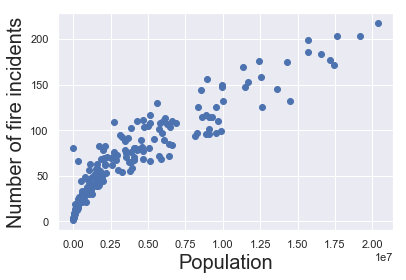

In [35]:
plt.scatter(x1,y)
plt.xlabel('Population',fontsize=20)
plt.ylabel('Number of fire incidents',fontsize=20)
plt.show()

In [36]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     INCIDENT_TYPE_DESC   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.02e-74
Time:                        00:40:48   Log-Likelihood:                -753.22
No. Observations:                 175   AIC:                             1510.
Df Residuals:                     173   BIC:                             1517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8572      1.909     16.684      0.000      28.089      35.626
Population  9.738e-06   3.04e-07     32.072      0.000    9.14e-06    1.03e-05
==============================================================================
Omnibus:                        5.086   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.192
Skew:                           0.401   Prob(JB):                       0.0746
Kurtosis:                       2.740   Cond. No.                     8.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
results.rsquared

0.8560275257034646

In [9]:
detector = (copydata.loc[(copydata['CO_DETECTOR_PRESENT_DESC']=='Yes')]).append(copydata.loc[(copydata['CO_DETECTOR_PRESENT_DESC']=='No')])



In [10]:
detector.reset_index(inplace=True)

In [11]:
detector['Total_minutes'] = detector['TOTAL_INCIDENT_DURATION']/60

In [12]:
totalco=len(detector)

In [13]:
Y20_30=0
N20_30=0
Y30_40=0
N30_40=0
Y40_50=0
N40_50=0
Y50_60=0
N50_60=0
Y60_70=0
N60_70=0

for i in range(len(detector)):
    if detector['Total_minutes'][i]<30 and detector['Total_minutes'][i]>=20:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            Y20_30+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            N20_30+=1
    if detector['Total_minutes'][i]<40 and detector['Total_minutes'][i]>=30:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            Y30_40+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            N30_40+=1
        
    if detector['Total_minutes'][i]<50 and detector['Total_minutes'][i]>=40:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            Y40_50+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            N40_50+=1
        
    if detector['Total_minutes'][i]<60 and detector['Total_minutes'][i]>=50:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            Y50_60+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            N50_60+=1
        
    if detector['Total_minutes'][i]<70 and detector['Total_minutes'][i]>=60:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            Y60_70+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            N60_70+=1
        

In [14]:
co_detector = pd.DataFrame()
yes = [Y20_30/totalco, Y30_40/totalco, Y40_50/totalco, Y50_60/totalco, Y60_70/totalco]
no = [N20_30/totalco, N30_40/totalco, N40_50/totalco, N50_60/totalco, N60_70/totalco]
names = ['B20_30', 'B30_40', 'B40_50', 'B50_60', 'B60_70']
co_detector['CO detector present'] = pd.Series(yes,index = names)
co_detector['CO detector absent'] = pd.Series(no,index = names)
co_detector['Ratio'] = co_detector['CO detector absent']/co_detector['CO detector present']
co_detector['Bins'] = pd.Series([25,35,45,55,65], index =names)

In [15]:
co_detector

,CO detector present,CO detector absent,Ratio,Bins
B20_30,0.218736,0.039798,0.181944,25
B30_40,0.072519,0.019680,0.271375,35
B40_50,0.031205,0.011794,0.377970,45
B50_60,0.016209,0.008391,0.517672,55
B60_70,0.007919,0.005324,0.672340,65


In [40]:
y = co_detector['Ratio']
x1 = co_detector['Bins']

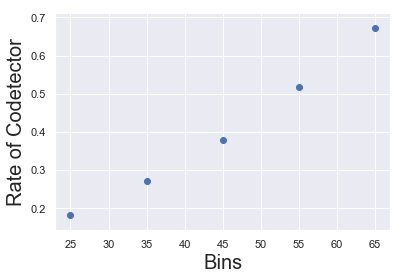

In [41]:
plt.scatter(x1,y)
plt.xlabel('Bins',fontsize=20)
plt.ylabel('Rate of Codetector',fontsize=20)
plt.show()

In [42]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ratio   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           0.000606
Time:                        10:22:06   Log-Likelihood:                 12.556
No. Observations:                   5   AIC:                            -21.11
Df Residuals:                       3   BIC:                            -21.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1479      0.038     -3.912      0.030      -0.268      -0.028
Bins           0.0123      0.001     15.305      0.001       0.010       0.015
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.388
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.539
Skew:                           0.104   Prob(JB):                        0.764
Kurtosis:                       1.404   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
results.params[0]+(results.params[1]*39)

0.33063497356955895

In [44]:
yesmorethan60=0
nomorethan60 = 0
yeslessthan60=0
nolessthan60=0
for i in range(len(detector)):
    if detector['Total_minutes'][i]>=60:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            yesmorethan60+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            nomorethan60+=1
    if detector['Total_minutes'][i]<60:
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='Yes':
            yeslessthan60+=1
        if detector['CO_DETECTOR_PRESENT_DESC'][i]=='No':
            nolessthan60+=1

In [45]:
co_detector60 = pd.DataFrame()
yes = [yeslessthan60,yesmorethan60]
no = [nolessthan60,nomorethan60]
names = ['lessthan60', 'morethan60']
co_detector60['CO detector absent'] = pd.Series(no,index = names)
co_detector60['CO detector present'] = pd.Series(yes,index = names)



In [18]:
co_detector60

,CO detector absent,CO detector present
lessthan60,4785,23196
morethan60,859,835


In [26]:
co_detector

,CO detector present,CO detector absent,Ratio,Bins
B20_30,0.218736,0.039798,0.181944,25
B30_40,0.072519,0.019680,0.271375,35
B40_50,0.031205,0.011794,0.377970,45
B50_60,0.016209,0.008391,0.517672,55
B60_70,0.007919,0.005324,0.672340,65


In [47]:
y = co_detector['CO detector present']
x1 = co_detector['Bins']

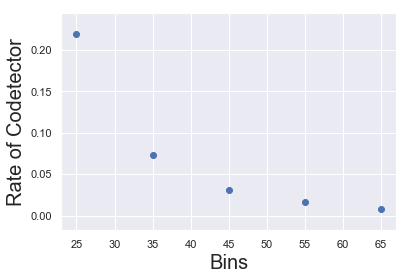

In [48]:
plt.scatter(x1,y)
plt.xlabel('Bins',fontsize=20)
plt.ylabel('Rate of Codetector',fontsize=20)
plt.show()

In [49]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO detector present   R-squared:                       0.752
Model:                             OLS   Adj. R-squared:                  0.669
Method:                  Least Squares   F-statistic:                     9.094
Date:                 Mon, 04 Feb 2019   Prob (F-statistic):             0.0570
Time:                         10:22:52   Log-Likelihood:                 9.1491
No. Observations:                    5   AIC:                            -14.30
Df Residuals:                        3   BIC:                            -15.08
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.075      3.804      0.032       0.046       0.522
Bins          -0.0048      0.002     -3.016      0.057      -0.010       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.641
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                           0.177   Prob(JB):                        0.754
Kurtosis:                       1.394   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
results.params[0]+(results.params[1]*60)

-0.002374052232519075

In [30]:
y = co_detector['CO detector absent']
x1 = co_detector['Bins']

In [31]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO detector absent   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     16.00
Date:                Mon, 04 Feb 2019   Prob (F-statistic):             0.0280
Time:                        10:18:41   Log-Likelihood:                 19.485
No. Observations:                   5   AIC:                            -34.97
Df Residuals:                       3   BIC:                            -35.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0531      0.009      5.613      0.011       0.023       0.083
Bins          -0.0008      0.000     -4.001      0.028      -0.001      -0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.593
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.576
Skew:                           0.166   Prob(JB):                        0.750
Kurtosis:                       1.371   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

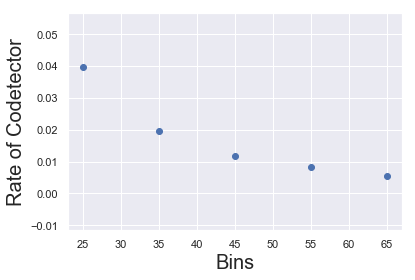

In [32]:
plt.scatter(x1,y)
plt.xlabel('Bins',fontsize=20)
plt.ylabel('Rate of Codetector',fontsize=20)
plt.show()